# Librairies et Import des données

In [1]:
import pandas as pd #pour le travail sur dataset
import numpy as np
import os #pour obtenir le chemin (arborescence différente en fonction de l'ordinateur)
import datetime as dt #pour travailler sur des périodes de temps
import matplotlib.pyplot as plt #pour la réalisation de graphiques
import seaborn as sns #pour la data visualisation 
import subPart1_2 as s #notre module

# Import des données

On considère que les fichiers sont dans le même dossier que ce notebook.

In [2]:
calendar= s.calendar
listings= s.listings

# Sommaire
1. [Partie 1](#Part1)
    1. [Description des données](#Q0)
    2. [Prix moyen des locations par quartier et représentation graphique](#Q1)
    3. [Logements disponibles](#Q2)
    4. [Déterminantes du prix de location](#Q3)
    5. [Faire des économies et locations chères](#Q4)

2. [Partie 2](#Part2)
    1. [Contraintes=Prix/Nuit](#Q5)
    2. [Type de location](#Q6)
    3. [Choix Quartier](#Q7)
    4. [Installations](#Q8)
    5. [Disponibilité par date](#Q9)
    6. [Barre de recherche](#QBonus)


# Partie 1: Analyse descriptive des bases et visualisation <a name="Part1"></a>

### Description des données <a name="Q0"></a>

#### Calendar

In [3]:
print("Il contient",calendar.shape[0],"observations et",calendar.shape[1],"variables.","\n")
print("Les noms des colonnes de <calendar> sont :","\n",calendar.columns)

Il contient 1393570 observations et 4 variables. 

Les noms des colonnes de <calendar> sont : 
 Index(['listing_id', 'date', 'available', 'price'], dtype='object')


#### Listings

In [4]:
print("Voici une description statistique du fichier <listings> : ")
listings.describe()

Voici une description statistique du fichier <listings> : 


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [5]:
print("Il contient",listings.shape[0],"observations et",listings.shape[1],"variables.","\n")
print("Les noms des colonnes de <listings> sont :\n","\n",listings.columns)

Il contient 3818 observations et 92 variables. 

Les noms des colonnes de <listings> sont :
 
 Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 

### Nettoyage pour la partie 1

In [6]:
s.nettoyage1()

C:\Users\yjsem\Documents\Projet\ProjetPy\sujet_1_HUANG_JSEM_LIU_ZHOU\subPart1_2.py:35: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings["price_dollar"] = listings["price"].str.replace('$','')# $ est un caractère spécial qui nous empêche de traiter les prix comme des type float
C:\Users\yjsem\Documents\Projet\ProjetPy\sujet_1_HUANG_JSEM_LIU_ZHOU\subPart1_2.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings["price_dollar"][3122] = listings["price_dollar"][3122].replace(",","")
C:\Users\yjsem\Documents\Projet\ProjetPy\sujet_1_HUANG_JSEM_LIU_ZHOU\subPart1_2.py:58: FutureWarning: The default value of regex will change from True to Fals

### Prix moyen des locations par quartier et représentation graphique <a name="Q1"></a>

#### Prix des locations par quartier

In [7]:
print("Le prix moyen par quartier est :")
listings[["price_float","neighbourhood_cleansed"]].groupby(["neighbourhood_cleansed"]).mean()

Le prix moyen par quartier est :


,price_float
neighbourhood_cleansed,
Adams,121.671429
Alki,171.619048
Arbor Heights,126.800000
Atlantic,111.396226
Belltown,162.893162
...,...
West Woodland,124.343750
Westlake,194.470588
Whittier Heights,128.653846


[]

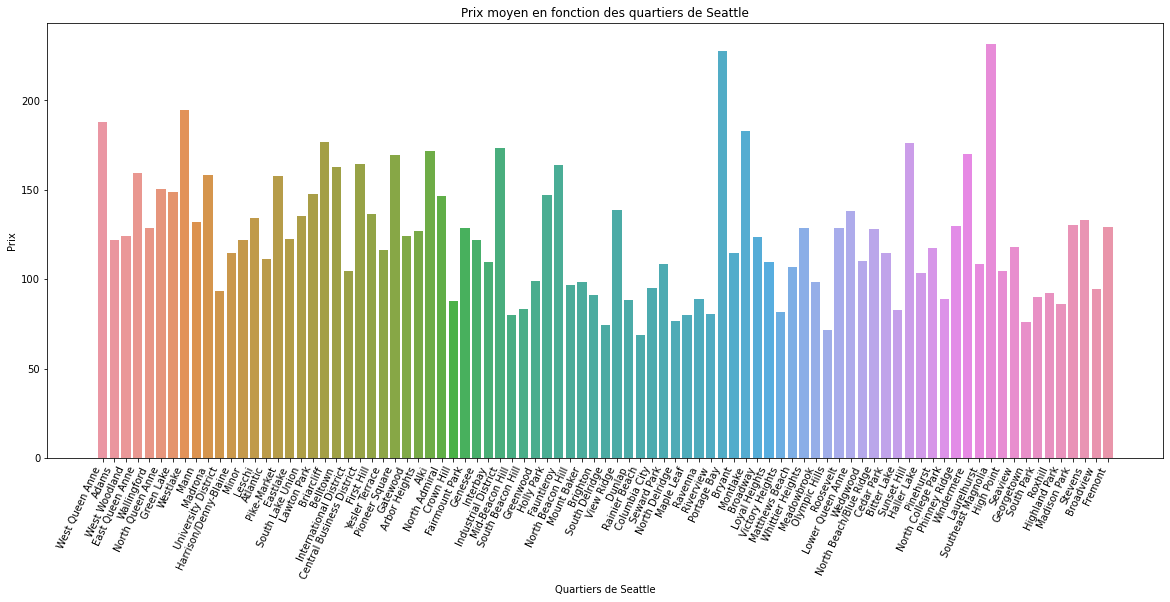

In [8]:
# graphique de prix par quartiers

fig, ax = plt.subplots(figsize=(20, 8))

sns.barplot(x="neighbourhood_cleansed", y="price_float", ci=None, data=listings)
ax.set_xticklabels(ax.get_xticklabels(), rotation=65,horizontalalignment='right')

plt.title("Prix moyen en fonction des quartiers de Seattle")
plt.ylabel("Prix")
plt.xlabel("Quartiers de Seattle")
plt.plot()

Pour une meilleure visibilité on va utilise les quartiers regroupés et nettoyé (sans valeurs nulles)

[]

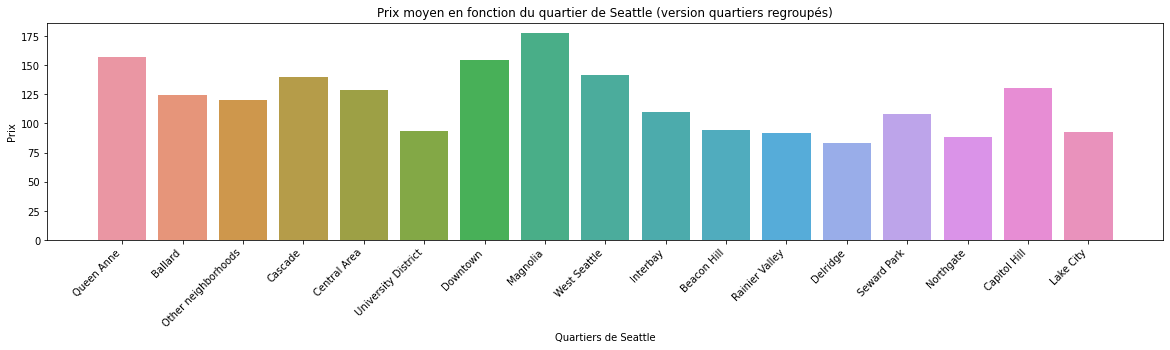

In [9]:
fig, ax = plt.subplots(figsize=(20, 4))

sns.barplot(x="neighbourhood_group_cleansed", y="price_float", ci=None, data=listings)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title("Prix moyen en fonction du quartier de Seattle (version quartiers regroupés)")
plt.ylabel("Prix")
plt.xlabel("Quartiers de Seattle")
plt.plot()

In [10]:
print("Le prix moyen par quartier puis par logement est :")
listings[["price_float","neighbourhood_cleansed","property_type"]].groupby(["neighbourhood_cleansed","property_type"]).mean()

Le prix moyen par quartier puis par logement est :


price_float
neighbourhood_cleansed property_type             
Adams                  Apartment       121.148148
                       Bungalow        105.000000
                       Cabin            89.000000
                       Condominium      97.500000
                       House           133.764706
...                                           ...
Windermere             Apartment       163.333333
                       House           172.714286
Yesler Terrace         Apartment       110.500000
                       Condominium     125.000000
                       House           179.000000

[343 rows x 1 columns]

[]

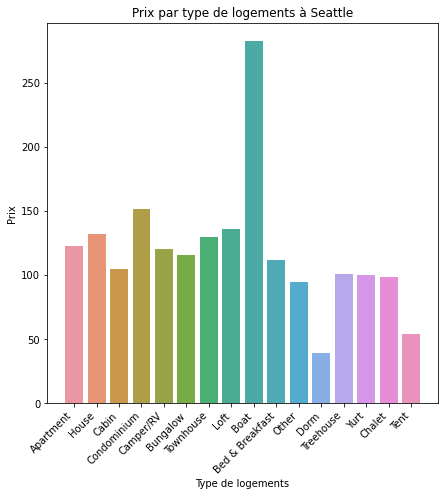

In [11]:
# graphique de prix par type de logements

fig, ax = plt.subplots(figsize=(7, 7)) # taille du graphe

sns.barplot(x="property_type", y="price_float", ci = None, data=listings) # ci = None pour enlever les IC
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right') # pour mettre les noms de quartier en biais

plt.title("Prix par type de logements à Seattle")
plt.ylabel("Prix")
plt.xlabel("Type de logements")
plt.plot()

### Logements disponibles <a name="Q2"></a>

Quels sont les mois de l’année où il y a le plus de logements disponibles ? Le moins ?

Interprétation de la question: Qu’est-ce qu’un logement disponible ? On va décider de compter un logement disponible à partir du moment où celui-ci est disponible au moins 1 jour dans le mois et on le comptera une fois (ex: si le logement 32 est disponible 2 jours du mois de janvier on le compte 1 fois).

In [12]:
#creation d'une nouvelle dataframe où on considere que pour UN logement si il est disponible AU MOINS un jour du mois il sera marqué dispo pour le mois
df_inter=calendar[["listing_id",'month',"dispo","year"]].groupby(["listing_id","year","month"]).max()
df_inter


dispo
listing_id year month       
3335       2016 1          0
                10         1
                11         1
                12         1
                2          1
...                      ...
10340165   2016 6          1
                7          1
                8          1
                9          1
           2017 1          1

[49634 rows x 1 columns]

In [13]:
# ici on cherche a compter le nombre de logement disponible pour chaque mois de l'année 2017 et 2016 avec sum()
df_finalQ2=df_inter.groupby(["year","month"]).sum()
df_finalQ2

dispo
year month       
2016 1       2868
     10      2694
     11      2771
     12      2866
     2       2895
     3       2950
     4       3002
     5       2705
     6       2720
     7       2503
     8       2561
     9       2649
2017 1       2931

In [14]:
max_2016 = df_finalQ2.max() # max de 2016
df_finalQ2.loc[df_finalQ2["dispo"] == int(max_2016)]

,,dispo
year,month,
2016,4,3002


In [15]:
min_2016 = df_finalQ2.min() # min de 2016
df_finalQ2.loc[df_finalQ2["dispo"] == int(min_2016)]

,,dispo
year,month,
2016,7,2503


En 2016, le mois où il y a le plus de logements disponibles est le mois d'avril et le mois où il y en a le moins c'est juillet. En 2017, il y a qu'un seul mois donc on s'interesse seulement à 2016.

### Déterminants du prix de location <a name="Q3"></a>

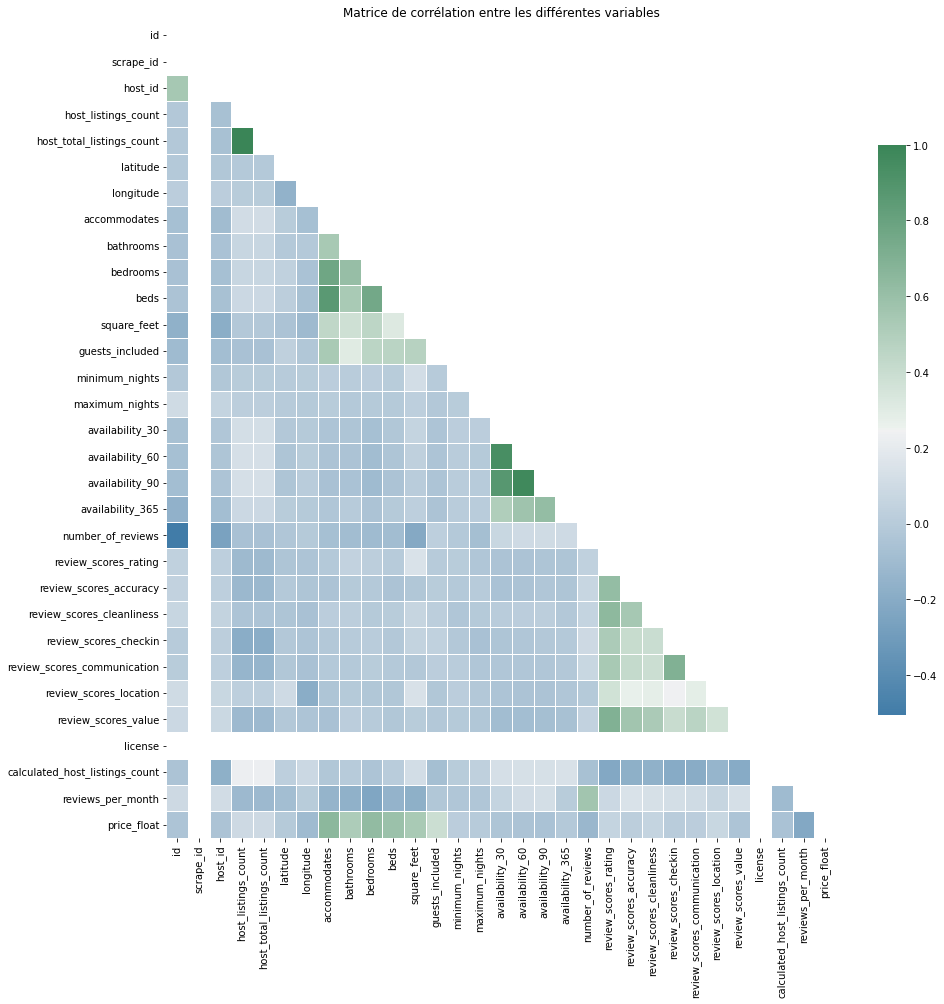

In [16]:
#Corrélation
f, ax = plt.subplots(figsize=(15, 15))

CorList=listings.corr()

pres=np.triu(np.ones_like(CorList, dtype=bool))#triu=triangular upper
color = sns.diverging_palette(240, 500, as_cmap=True)
sns.heatmap(CorList,mask=pres,cmap=color,annot=False,linewidths=1,cbar_kws={"shrink": .7})
#linewidth=espacement entre carreaux
#cbar_kws=échelle des corrélations
#mask= masquer le triangle supérieur
#cmap= la couleur

plt.title("Matrice de corrélation entre les différentes variables")
plt.show()

On remarque que le prix est fortement influencé de façon positive par le nombre d'accommodation, de chambres, de salles de bains et de lits. En revanche il est corrélé négativement par le nombre de reviews

### Meilleur mois pour visiter Seattle et le mois le plus cher <a name="Q4"></a>

1. Nous séparons les deux années afin d'avoir le meilleur et pire mois (en fonction du prix par nuit) pour visiter Seattle

In [17]:
# 2016
calendar_2016 = calendar[calendar["year"]=="2016"] # ici on récupère le df uniquement sur 2016
calendar_dispo_2016 = calendar_2016.groupby(["month"]).agg({"dispo":"sum"}) 
# nombre de logements disponibles par mois en 2016

#2017
calendar_2017 = calendar[calendar["year"]=="2017"]
calendar_dispo_2017 = calendar_2017.groupby(["month"]).agg({"dispo":"sum"})


In [18]:
calendar_2016["price_dollar"] = calendar_2016["price"].astype(str) # crée nouvelle variable et force à convertir en str
calendar_2016["price_dollar"] = calendar_2016["price"].str.replace('$','') # supprime $
calendar_2016["price_float"] = calendar_2016["price_dollar"].str.replace(',','').astype(np.float64)

calendar_2017["price_dollar"] = calendar_2017["price"].astype(str) # crée nouvelle variable et force à convertir en str
calendar_2017["price_dollar"] = calendar_2017["price"].str.replace('$','') # supprime $
calendar_2017["price_float"] = calendar_2017["price_dollar"].str.replace(',','').astype(np.float64)


C:\Users\yjsem\AppData\Local\Temp/ipykernel_15796/3108647317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendar_2016["price_dollar"] = calendar_2016["price"].astype(str) # crée nouvelle variable et force à convertir en str
C:\Users\yjsem\AppData\Local\Temp/ipykernel_15796/3108647317.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar_2016["price_dollar"] = calendar_2016["price"].str.replace('$','') # supprime $
C:\Users\yjsem\AppData\Local\Temp/ipykernel_15796/3108647317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [19]:
calendar_dispo_meilleur = calendar.loc[calendar["dispo"]==1] # on récupère que les logements disponibles

calendar_dispo_meilleur_2016 = calendar_2016.loc[calendar["dispo"]==1]
calendar_dispo_meilleur_2017 = calendar_2017.loc[calendar["dispo"]==1]
calendar_dispo_meilleur_2016

,listing_id,date,available,price,month,year,price_dollar,price_float,dispo
0,241032,2016-01-04,t,$85.00,1,2016,85.00,85.0,1
1,241032,2016-01-05,t,$85.00,1,2016,85.00,85.0,1
9,241032,2016-01-13,t,$85.00,1,2016,85.00,85.0,1
10,241032,2016-01-14,t,$85.00,1,2016,85.00,85.0,1
14,241032,2016-01-18,t,$85.00,1,2016,85.00,85.0,1
...,...,...,...,...,...,...,...,...,...
1393207,10208623,2016-01-06,t,$87.00,1,2016,87.00,87.0,1
1393208,10208623,2016-01-07,t,$87.00,1,2016,87.00,87.0,1
1393211,10208623,2016-01-10,t,$87.00,1,2016,87.00,87.0,1
1393212,10208623,2016-01-11,t,$87.00,1,2016,87.00,87.0,1


2. Réalisation d'un groupby par mois

In [20]:
df_=calendar_dispo_meilleur[["price_float","month"]].groupby(["month"]).mean()
df_#nouvelle dataframe avec le prix moyen par mois des logements

,price_float
month,
1,122.912176
10,137.031939
11,135.688738
12,137.251835
2,124.293927
3,128.644488
4,135.097005
5,139.538183
6,147.473137


In [21]:
df_=calendar_dispo_meilleur_2016[["price_float","month"]].groupby(["month"]).mean()
df_#nouvelle dataframe avec le prix moyen par mois des logements

,price_float
month,
1,121.568409
10,137.031939
11,135.688738
12,137.251835
2,124.293927
3,128.644488
4,135.097005
5,139.538183
6,147.473137


In [22]:
df__=calendar_dispo_meilleur_2017[["price_float","month"]].groupby(["month"]).mean()
df__#nouvelle dataframe avec le prix moyen par mois des logements

,price_float
month,
1,136.88259


In [23]:
mois = ["janvier","février","mars","avril","mai","juin","juillet","août","septembre","octobre","novembre","décembre"]

print("Le meilleur mois pour faire des économies en 2016 est :",mois[int(df_.idxmin())-1])#affiche le mois de l'année ou on pourra trouver les prix plus faibles en moyennes 
print("Le mois le plus cher en 2016 est :",mois[int(df_.idxmax())-1])#affiche le mois de l'année ou on pourra trouver les prix plus élevés en moyenne

print("Le meilleur mois pour faire des économies en 2017 est :",mois[int(df__.idxmin())-1])#affiche le mois de l'année ou on pourra trouver les prix plus faibles en moyennes 
print("Le mois le plus cher en 2017 est :",mois[int(df__.idxmax())-1])#affiche le mois de l'année ou on pourra trouver les prix plus élevés en moyenne


Le meilleur mois pour faire des économies en 2016 est : janvier
Le mois le plus cher en 2016 est : juillet
Le meilleur mois pour faire des économies en 2017 est : janvier
Le mois le plus cher en 2017 est : janvier


# Partie 2: Moteur de Recherche <a name="Part2"></a>

Afficher Titre de l'annonce, résumé, type de logement, prix par nuit, quartier, nombre de chambre, nom de l'hôte

Reviens à afficher les info suivantes: 
`"name"`,`"summary"`,`"property_type"`,`"price_float"`,`"neighbourhood_group_cleansed"`,`"bedrooms"`,`"host_name"`


### Nettoyage des données pour la partie 2

In [24]:
s.nettoyage2()

### Contrainte: Prix/Nuit <a name="Q5"></a>

In [25]:
s.pricenight()

### Type de location <a name="Q6"></a>

In [26]:
s.proptype()

### Choix Quartier <a name="Q7"></a>

In [27]:
s.quartype()

### Installations <a name="Q8"></a>

In [28]:
s.instatype()

### Disponibilité par date <a name="Q9"></a>

In [29]:
s.logement_dispo()

### Barre de Recherche ! <a name="QBonus"></a>

In [30]:
s.recherche()